**PERSIAPAN**

Mengimport library yang digunakan yaitu pandas, matplotlib, dan seaborn.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [ ]:
# Dataset dibaca sebagai *df*
df = pd.read_csv('DataSudahBersih_synthetic_asthma_dataset (1).csv')

In [ ]:
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,Dust,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,Unknown
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,Unknown
2,ASTH100002,72,Female,17.6,Never,0,Dust,Moderate,Moderate,Indoor,Diabetes,0.38,0,303.3,15.3,0,Unknown
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,Dust,Moderate,Active,Indoor,Diabetes,0.82,3,535.0,27.7,0,Unknown


In [ ]:
# Melihat informasi jumlah baris dan kolom serta tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                10000 non-null  object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            10000 non-null  object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [ ]:
# cek untuk memastikan data tidak ada yang hilang
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
BMI,0
Smoking_Status,0
Family_History,0
Allergies,0
Air_Pollution_Level,0
Physical_Activity_Level,0
Occupation_Type,0


In [ ]:
# Melihat statistik dasar dari kolom-kolom bertipe numerik
df.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


Dataset menunjukkan bahwa pasien dalam studi ini sebagian besar adalah usia produktif hingga lansia awal, dengan rata-rata BMI masuk kategori overweight, dan kepatuhan terhadap obat yang masih rendah. Walaupun hanya sekitar 24% pasien memiliki asma, indikator klinis seperti FeNO dan PEF menunjukkan adanya variasi besar dalam fungsi paru. Faktor risiko potensial yang dapat diperhatikan adalah tingginya prevalensi overweight, rendahnya kepatuhan obat, serta adanya riwayat keluarga pada sebagian pasien.

# **Analisis Statistik Deskriptif**

In [ ]:
# Melihat statistik dasar dari kolom-kolom kategorikal
df.describe(include='object')

,Patient_ID,Gender,Smoking_Status,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Asthma_Control_Level
count,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,3,3,4,3,3,2,3,4
top,ASTH109983,Female,Never,Dust,Moderate,Sedentary,Indoor,Diabetes,Unknown
freq,1,4814,6070,5415,4915,4062,7035,6996,7567


**ANALISIS FREKUENSI**

Melihat lebih dalam kolom gender.
Bagaimana distribusi pasien penderita asma berdasarkan jenis kelamin (laki-laki dan perempuan)?


Pendekatan yang Lebih Baik (Bar Chart)


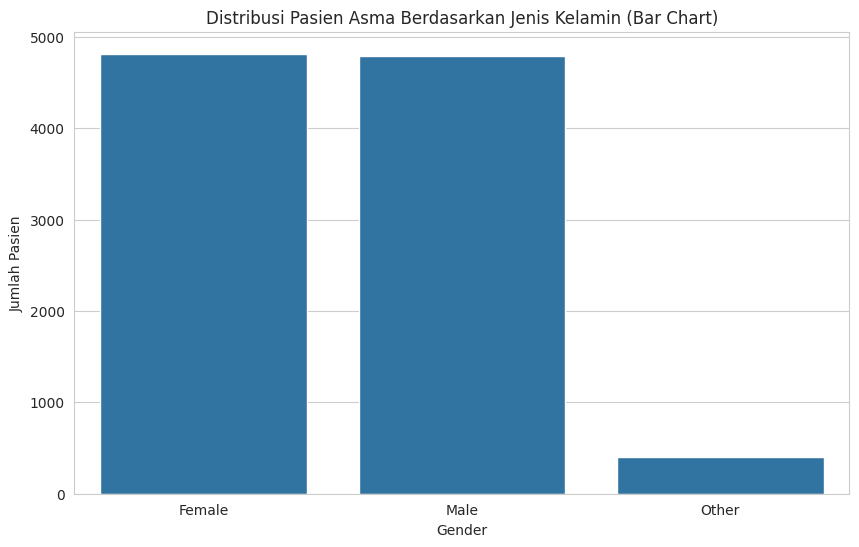

In [ ]:
# Pendekatan yang Lebih Baik: Bar Chart
print("\nPendekatan yang Lebih Baik (Bar Chart)")
plt.figure(figsize=(10, 6))

# Calculate gender counts
Gender_counts = df['Gender'].value_counts()

sns.countplot(x='Gender', data=df, order=Gender_counts.index)
plt.title('Distribusi Pasien Asma Berdasarkan Jenis Kelamin (Bar Chart)')
plt.ylabel('Jumlah Pasien')
plt.xlabel('Gender')
plt.show()

**Interpretasi/Insight**


Berdasarkan grafik Distribusi Pasien Asma Berdasarkan Jenis Kelamin, terlihat bahwa jumlah pasien laki-laki dan perempuan relatif seimbang dengan selisih yang tidak terlalu signifikan, yakni masing-masing berada di kisaran lebih dari 4.800 pasien. Sementara itu, jumlah pasien dengan kategori jenis kelamin lain (misalnya Other) jauh lebih sedikit, hanya sekitar 300–400 pasien. Temuan ini menunjukkan bahwa penderita asma hampir merata antara laki-laki dan perempuan, sedangkan jumlah kasus pada kelompok selain keduanya masih sangat kecil. Distribusi ini bisa menjadi dasar analisis lebih lanjut terkait apakah ada perbedaan pola faktor risiko atau tingkat kontrol asma berdasarkan jenis kelamin.

In [ ]:
# Menghitung frekuensi setiap kategori
comorbidities_counts = df['Comorbidities'].value_counts()
print("Hasil perhitungan frekuensi penyakit penyerta:")
print(comorbidities_counts)

Hasil perhitungan frekuensi penyakit penyerta:
Comorbidities
Diabetes        6996
Hypertension    2018
Both             986
Name: count, dtype: int64


**Berapa persen pengidap asma yang juga mengidap diabetes dan hipertensi maupun keduanya?**


Pendekatan Kurang Tepat (Pie Chart)


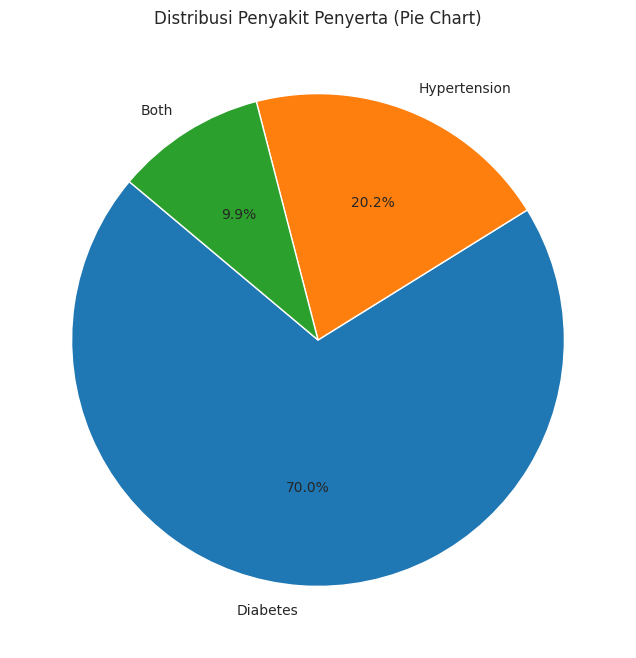

In [ ]:
# Pendekatan yang Kurang Tepat: Pie Chart
print("\nPendekatan Kurang Tepat (Pie Chart)")
plt.figure(figsize=(8, 8))
plt.pie(comorbidities_counts, labels=comorbidities_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Penyakit Penyerta (Pie Chart)')
plt.show()

**Interpretasi/Insight**

Berdasarkan diagram pie tersebut, dapat dilihat bahwa mayoritas pengidap asma yang memiliki penyakit penyerta adalah penderita diabetes dengan persentase sebesar 70%. Sementara itu, pengidap asma yang juga menderita hipertensi mencapai 20,2%, dan sisanya sebesar 9,9% merupakan pasien yang mengalami kedua penyakit sekaligus (diabetes dan hipertensi). Hal ini menunjukkan bahwa diabetes menjadi penyakit penyerta dominan pada pasien asma, sementara kasus komorbiditas ganda relatif lebih sedikit, meskipun tetap perlu mendapat perhatian karena berpotensi meningkatkan kompleksitas penanganan medis.


**Bagaimana distribusi jumlah penderita asma dengan penyakit penyerta diabetes, hipertensi, dan keduanya sekaligus?**


Pendekatan yang Lebih Baik (Bar Chart)


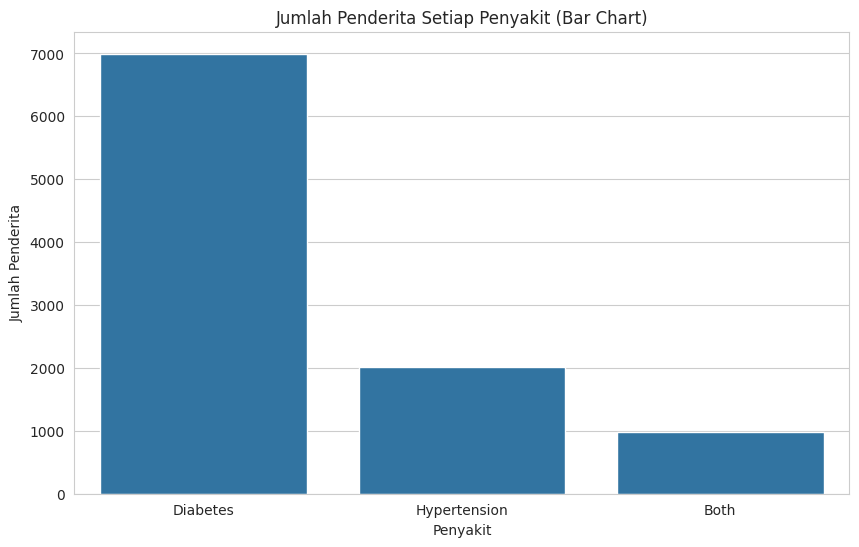

In [ ]:
# Pendekatan yang Lebih Baik: Bar Chart
import matplotlib.pyplot as plt #Library untuk visualisasi
import seaborn as sns #Library untuk visualisasi
print("\nPendekatan yang Lebih Baik (Bar Chart)")
plt.figure(figsize=(10, 6))
sns.countplot(x='Comorbidities', data=df, order=comorbidities_counts.index)
plt.title('Jumlah Penderita Setiap Penyakit (Bar Chart)')
plt.ylabel('Jumlah Penderita')
plt.xlabel('Penyakit')
plt.show()

**Interpretasi/Insight**

Histogram menunjukkan bahwa diabetes merupakan penyakit penyerta terbanyak pada pasien asma dengan jumlah sekitar 7000 penderita, jauh lebih tinggi dibandingkan hipertensi yang berjumlah sekitar 2000 penderita, serta pasien dengan komorbiditas ganda (diabetes dan hipertensi) yang berjumlah sekitar 1000 penderita. Hal ini mempertegas bahwa diabetes menjadi faktor penyerta dominan pada pasien asma, sedangkan hipertensi dan kombinasi keduanya lebih jarang terjadi. Temuan ini dapat menjadi dasar penting bagi prioritas intervensi medis, khususnya dalam pencegahan dan pengelolaan diabetes pada pasien asma.

**Pertanyaan Analitis :**

Apakah pasien perokok memiliki kontrol asma yang lebih buruk dibandingkan yang tidak merokok?

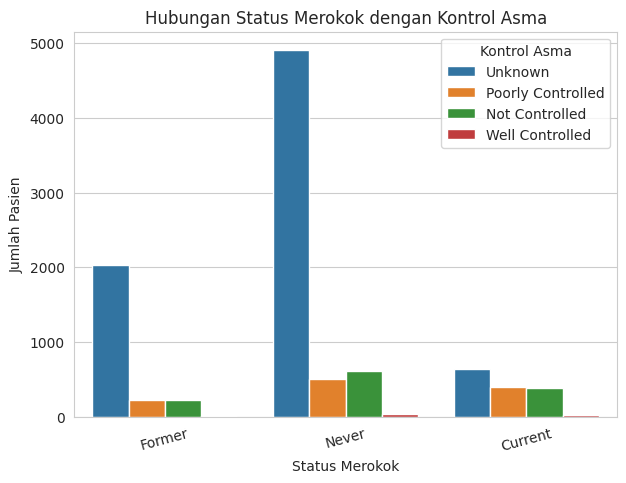

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Smoking_Status', hue='Asthma_Control_Level')
plt.title('Hubungan Status Merokok dengan Kontrol Asma')
plt.xlabel('Status Merokok')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Kontrol Asma')
plt.xticks(rotation=15)
plt.show()

# *Analisis Visual untuk Menjawab Pertanyaan*

## **1. Bagaimana perbandingan nilai antar kategori?**

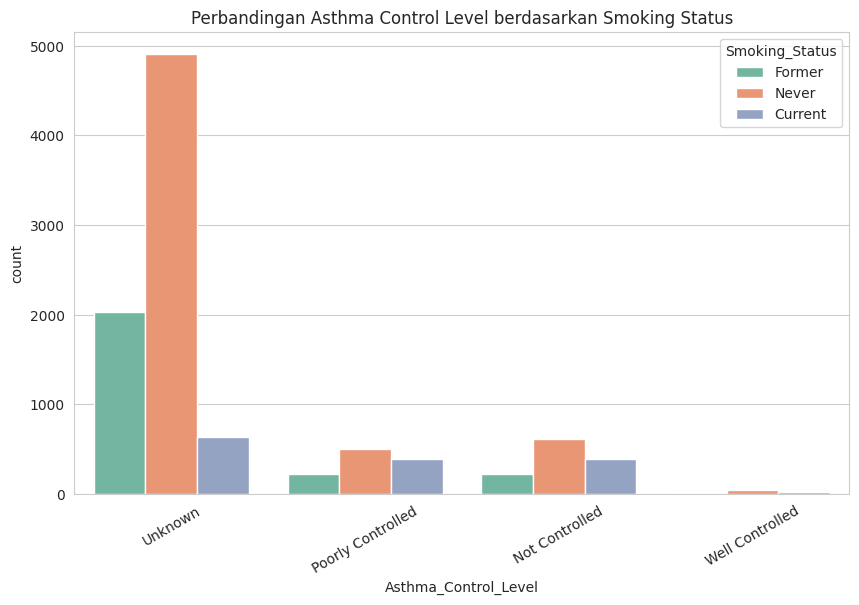

In [ ]:
# Perbandingan nilai antar kategori: Asthma_Control_Level menurut Smoking_Status
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Asthma_Control_Level", hue="Smoking_Status", palette="Set2")
plt.title("Perbandingan Asthma Control Level berdasarkan Smoking Status")
plt.xticks(rotation=30)
plt.show()

**Interpretasi** = Grafik menunjukkan bahwa sebagian besar data tingkat kontrol asma masih berstatus Unknown, terutama pada kelompok yang tidak pernah merokok. Meskipun demikian, terlihat bahwa proporsi penderita asma dengan kontrol yang buruk (Poorly Controlled dan Not Controlled) cenderung lebih tinggi pada kelompok perokok aktif dibandingkan kelompok lainnya, yang dapat di simpulkan bahwa kebiasaan merokok dapat memperburuk pengendalian asma. Selain itu, jumlah pasien dengan asma yang terkontrol dengan baik (Well Controlled) sangat sedikit di semua kelompok, menandakan secara umum pengelolaan asma dalam dataset ini masih kurang optimal.

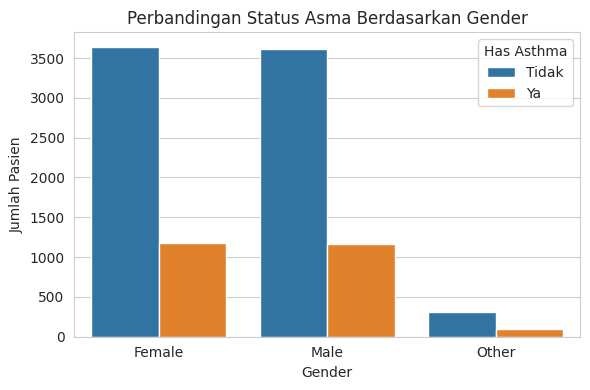

In [ ]:
# Perbandingan nilai antar kategori (contoh: Has_Asthma berdasarkan Gender)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Has_Asthma')
plt.title("Perbandingan Status Asma Berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah Pasien")
plt.legend(title="Has Asthma", labels=["Tidak", "Ya"])
plt.tight_layout()
plt.show()

**Interpretasi:** Grafik menunjukkan bahwa distribusi penderita asma antara laki-laki dan perempuan relatif seimbang, sedangkan kelompok “Other” memiliki jumlah yang sangat sedikit namun tetap terdapat kasus asma, sehingga dapat disimpulkan bahwa risiko asma pada dataset ini tidak jauh berbeda antar gender.

/tmp/ipython-input-2623193774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Asthma_Control_Level", y="BMI", palette="Set3")


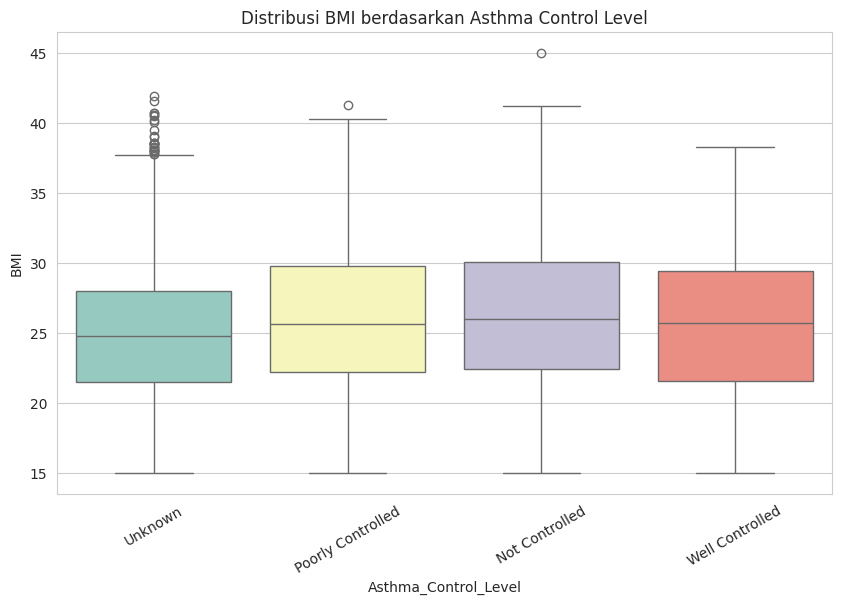

In [ ]:
# Boxplot BMI antar kategori Asthma_Control_Level
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Asthma_Control_Level", y="BMI", palette="Set3")
plt.title("Distribusi BMI berdasarkan Asthma Control Level")
plt.xticks(rotation=30)
plt.show()

**Interpretasi** = Boxplot menunjukkan bahwa distribusi BMI relatif mirip pada semua kategori Asthma Control Level, dengan median berada di kisaran 25 (kategori overweight ringan). Kelompok Poorly Controlled, Not Controlled, dan Well Controlled cenderung memiliki rentang BMI yang sedikit lebih lebar dibandingkan kelompok Unknown, dan terdapat beberapa outlier dengan BMI sangat tinggi terutama pada kelompok Unknown dan Not Controlled. Hal ini mengindikasikan bahwa pasien dengan asma, terlepas dari tingkat kontrolnya, cenderung memiliki BMI yang serupa, sehingga BMI mungkin bukan faktor pembeda utama dalam pengendalian asma pada dataset ini.

## ***2. Bagaimana distribusi/sebaran data?***

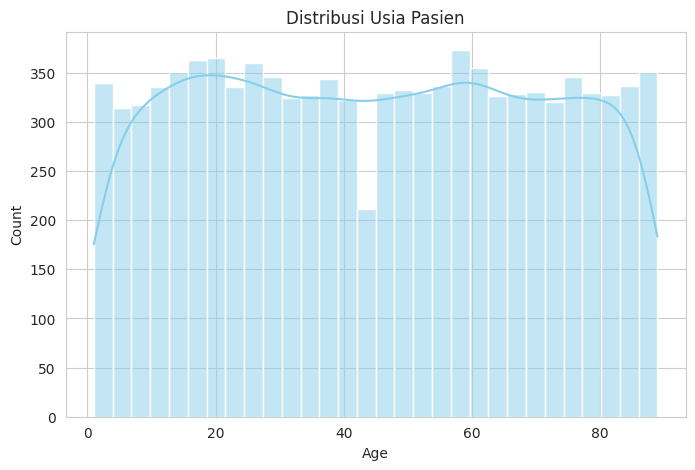

In [ ]:
# Distribusi umur
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color="skyblue")
plt.title("Distribusi Usia Pasien")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**Interpretasi Usia:** Grafik distribusi usia menunjukkan bahwa pasien tersebar merata di hampir semua rentang usia, mulai dari bayi hingga lansia. Jumlah pasien relatif konsisten di setiap kelompok umur, dengan sedikit puncak di usia sekitar 15–20 tahun dan 55–60 tahun. Hal ini mengindikasikan bahwa dataset mencakup populasi yang beragam dari segi usia, sehingga analisis dapat mencerminkan kondisi asma pada berbagai kelompok umur tanpa adanya bias dominan pada kelompok usia tertentu.

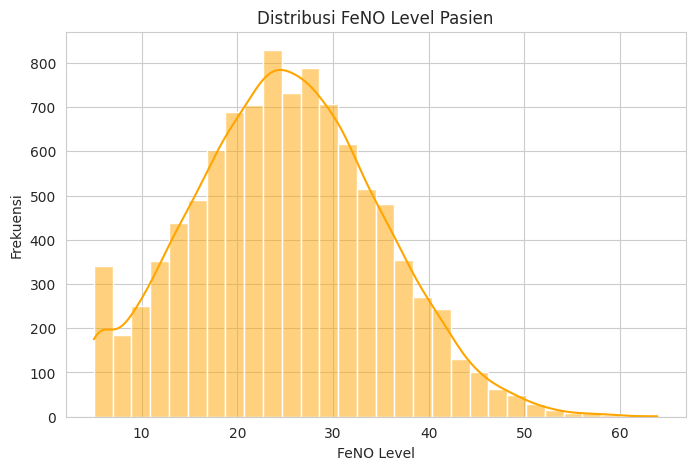

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['FeNO_Level'], bins=30, kde=True, color="orange")
plt.title("Distribusi FeNO Level Pasien")
plt.xlabel("FeNO Level")
plt.ylabel("Frekuensi")
plt.show()

**Interpretasi :** Grafik menunjukkan distribusi FeNO Level pasien yang berbentuk mirip distribusi normal dengan sedikit skew ke kanan (right-skewed). Sebagian besar pasien memiliki FeNO Level di kisaran 20–30, dengan puncak frekuensi sekitar 800 pasien. Semakin tinggi FeNO Level (di atas 40), jumlah pasien semakin menurun, sehingga nilai tinggi FeNO relatif jarang.

Dan ya, frekuensi di sumbu Y adalah jumlah pasien yang memiliki FeNO Level pada rentang tertentu (bin histogram). Jadi, setiap batang pada histogram menunjukkan berapa banyak pasien yang berada dalam interval nilai FeNO tertentu.

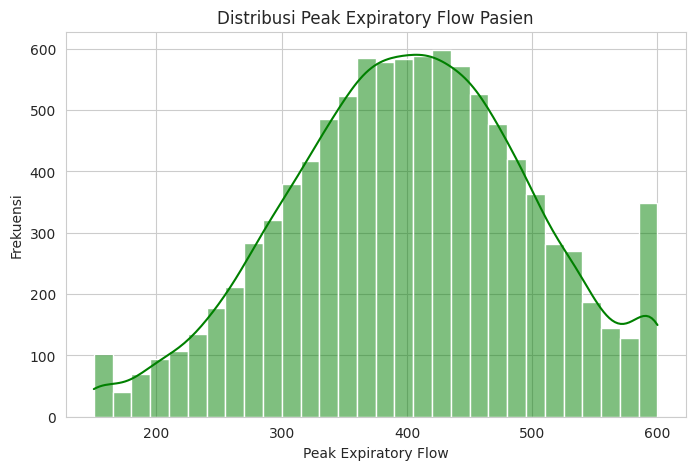

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Peak_Expiratory_Flow'], bins=30, kde=True, color="green")
plt.title("Distribusi Peak Expiratory Flow Pasien")
plt.xlabel("Peak Expiratory Flow")
plt.ylabel("Frekuensi")
plt.show()

**Interpretasi:** Grafik menunjukkan distribusi Peak Expiratory Flow (PEF) pasien yang berbentuk mendekati distribusi normal dengan puncak di sekitar 400 L/menit. Mayoritas pasien memiliki PEF antara 300–500 L/menit, yang menunjukkan fungsi paru-paru berada pada kisaran normal hingga sedikit menurun. Terdapat sedikit pasien dengan PEF sangat rendah (<200) maupun sangat tinggi (≥600), yang terlihat sebagai outlier pada ujung distribusi.

jadi singkatnya itu sebagian besar pasien memiliki kemampuan ekspirasi yang cukup baik, namun adanya kelompok dengan PEF rendah dapat mengindikasikan gangguan pernapasan atau kontrol asma yang buruk pada sebagian kecil pasien.

## **3. Apakah ada korelasi antar kolom?**

menggunakan heatmap korelasi

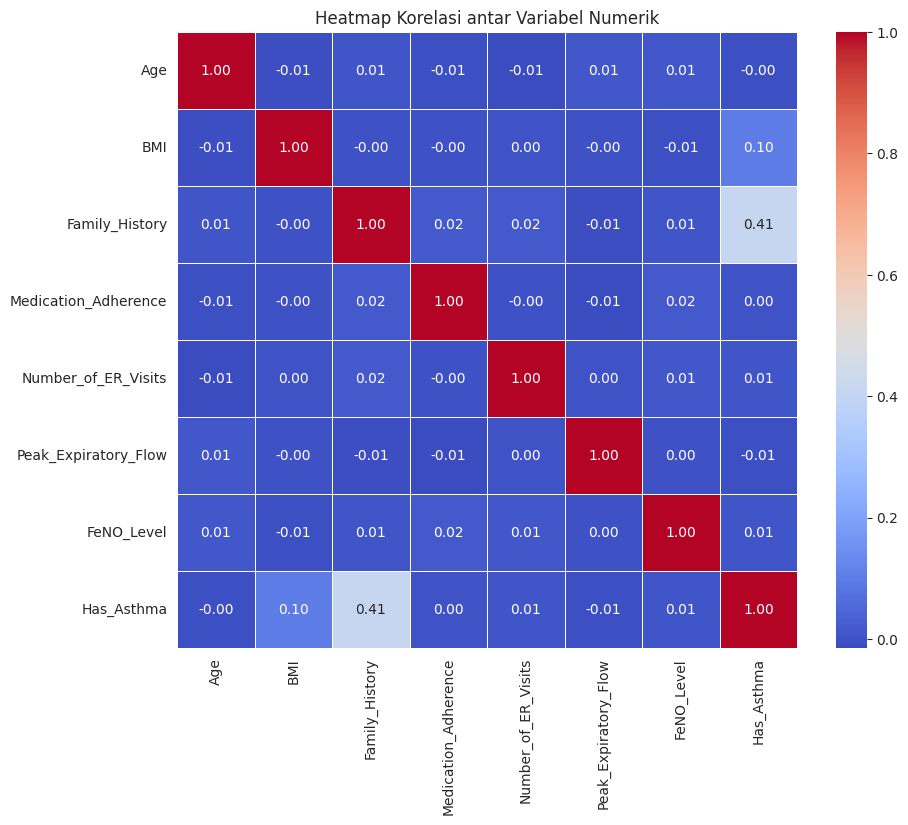

In [ ]:
# Pilih hanya kolom numerik untuk korelasi
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antar Variabel Numerik")
plt.show()


**Interpretasi:** Heatmap ini menunjukkan korelasi antar variabel numerik dalam dataset. Secara umum, sebagian besar korelasi antar variabel sangat rendah (mendekati nol), yang berarti variabel-variabel tersebut relatif independen. Korelasi yang paling menonjol adalah antara Family_History dan Has_Asthma dengan nilai sekitar 0,41, menunjukkan hubungan positif sedang — pasien dengan riwayat keluarga cenderung lebih berisiko menderita asma. Selain itu, BMI memiliki korelasi positif kecil dengan Has_Asthma (≈0,10), yang bisa mengindikasikan bahwa kelebihan berat badan sedikit meningkatkan risiko asma. Korelasi lainnya seperti Age, Medication_Adherence, Number_of_ER_Visits, Peak_Expiratory_Flow, dan FeNO_Level terhadap Has_Asthma sangat lemah, sehingga kemungkinan kontribusinya terhadap status asma relatif kecil bila dilihat dari hubungan linier sederhana.

# **Dokumentasi Insight dan Hipotesis**

## Insight

**Insight 1 - Riwayat Keluarga Sangat Berpengaruh terhadap Risiko Asma**

Hasil heatmap korelasi menunjukkan bahwa variabel Family_History memiliki korelasi sebesar 0.41 dengan variabel Has_Asthma. Nilai ini merupakan korelasi tertinggi dibandingkan variabel numerik lainnya.
Jadi Interpretasinya Pasien dengan riwayat keluarga asma memiliki kecenderungan lebih tinggi untuk menderita asma, yang mengindikasikan adanya faktor genetik yang kuat.



**Insight 2 - Distribusi Usia Pasien Merata**

Histogram distribusi usia menunjukkan bahwa pasien tersebar di hampir seluruh rentang umur dengan jumlah yang relatif seimbang. Tidak ada kelompok usia tertentu yang mendominasi secara signifikan.
jadi Interpretasinya Asma dapat dialami oleh pasien dari segala rentang usia, sehingga program pencegahan maupun edukasi kesehatan harus menjangkau seluruh kelompok umur, bukan hanya anak-anak atau lansia.

**Insight 3 - Mayoritas Data Kontrol Asma Berstatus "Unknown"**

Pada grafik hubungan antara status merokok dan kontrol asma, terlihat bahwa sebagian besar data berada pada kategori Unknown, terutama pada pasien yang tidak pernah merokok (Never Smoker).
Jadi Interpretasinya Tingginya proporsi data dengan status kontrol asma yang tidak diketahui dapat memengaruhi kualitas analisis lebih lanjut. Hal ini menandakan perlunya perbaikan kualitas pencatatan data di lapangan.



**Insight 4 - Pasien dengan Asma Terkontrol Baik Sangat Sedikit**

Visualisasi yang sama juga menunjukkan bahwa jumlah pasien dengan kategori Well Controlled sangat sedikit, bahkan hampir tidak terlihat pada sebagian kelompok status merokok. Jadi Interpretasinya Ini mengindikasikan bahwa manajemen asma pada populasi pasien masih perlu ditingkatkan, baik dari segi kepatuhan pengobatan maupun monitoring kesehatan.

## Hipotesis

H1: Pasien dengan riwayat keluarga asma memiliki risiko lebih tinggi menderita asma dibandingkan pasien tanpa riwayat keluarga.

H2: Status merokok memengaruhi tingkat kontrol asma, tetapi kesimpulan yang lebih valid memerlukan data kontrol asma yang lebih lengkap.

H3: Rendahnya jumlah pasien dengan asma terkontrol baik menunjukkan bahwa intervensi medis dan edukasi pasien masih perlu ditingkatkan agar kepatuhan pengobatan lebih optimal.

In [ ]:
print("selesai")

selesai
